<a href="https://colab.research.google.com/github/AdrienneLoc/AI/blob/main/HW7/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Multilayer Perceptron Model
## Author: Adrienne Loc
## Purpose:
> The purpose of this assignment was to explore multilayer perceptron models and how they work. This was done by completing the goal of this assignment: creating a multilayer perceptron model that identified if an asteroid was hazardous. In this assignment, I conducted 3 trials:
>> **Trial 1**: a multilayer perceptron model with 2 hidden layers, one layer with 40 neurons and the other layer with 50 neurons<br><br>
>> **Trial 2**: a multilayer perceptron model with 2 hidden layers, each with 1 neuron<br><br>
>> **Trial 3**: a multilayer perceptron moel with 1 hidden layer that had 1 neuron







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns



data = pd.read_csv('/content/drive/MyDrive/nasa_asteroid.csv')


data_copy = data.drop(['Neo Reference ID', 'Name', 'Equinox', 'Orbit ID', 'Orbit Determination Date', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbiting Body', 'Epoch Osculation', 'Orbit Uncertainity', 'Epoch Date Close Approach'], axis = 1)


scaler = StandardScaler()
data_copy_scaled = scaler.fit_transform(data_copy)
print(data_copy_scaled)

[[-0.23104209 -0.20941058 -0.20941058 ...  0.77839321 -0.43110028
   2.28209268]
 [-0.33482448 -0.15840557 -0.15840557 ... -0.06909298  0.31258164
  -0.4381943 ]
 [-0.68076581  0.07278876  0.07278876 ...  1.03940428 -0.52211437
   2.28209268]
 ...
 [ 0.14949337 -0.34623784 -0.34623784 ...  0.20776991 -0.63207867
  -0.4381943 ]
 [-0.16185382 -0.23970271 -0.23970271 ...  0.2079915  -0.56766111
  -0.4381943 ]
 [-1.09278193  0.53049632  0.53049632 ...  0.03397983 -0.54733945
  -0.4381943 ]]


# Reading the Data
> I started out by removing all the unnecessary data such as the Neo Reference ID and the Name as they do not contribute to the hazardous determination. The full list of columns that were removed can be found in the list located in the drop command.<br> I then scaled the data to *standardize* the input data and ensure that the data points were balanced.



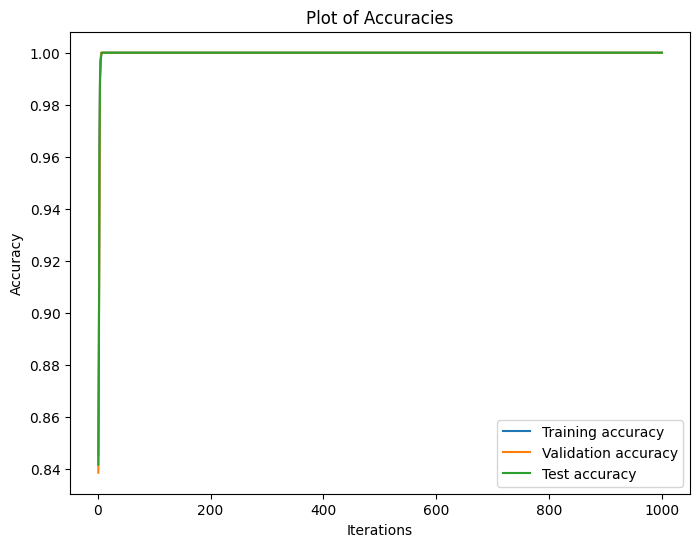

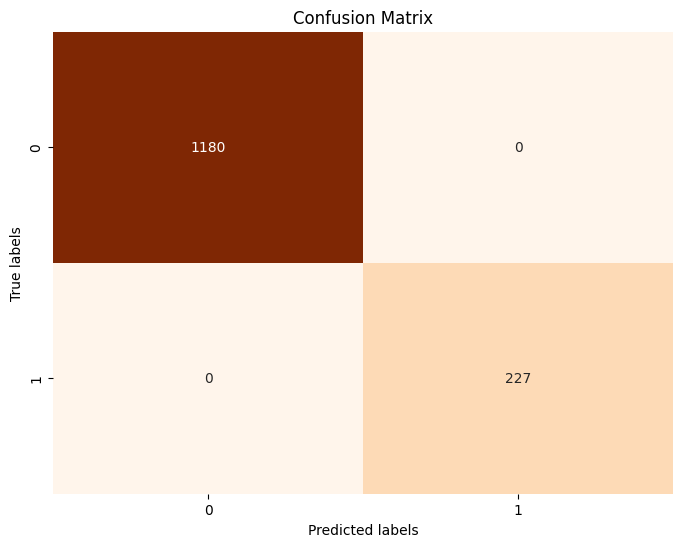


Complex Model: 2 hidden layer, one with 40 neurons, the other with 50 neurons
Layer 0 - Weight matrix shape: (30, 40)
Layer 1 - Weight matrix shape: (40, 50)
Layer 2 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (40,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (1,)
Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0


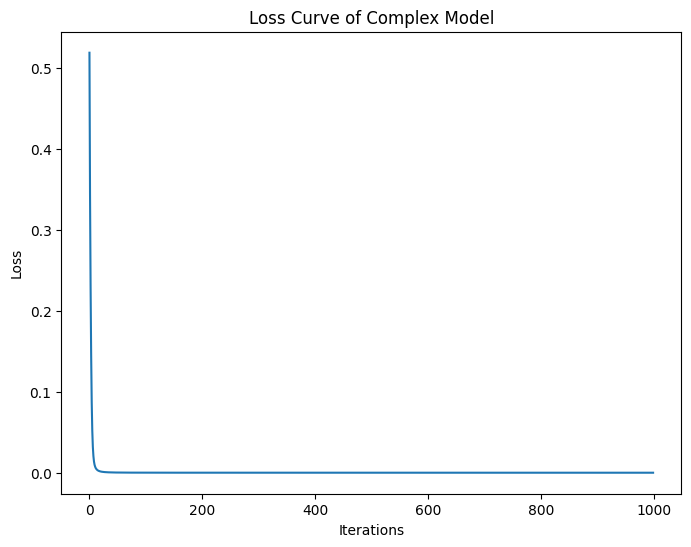

In [23]:
x = data_copy_scaled
y = (data_copy.Hazardous == True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=1000)


train_accuracies = []
val_accuracies = []
test_accuracies = []


for i in range(1000):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(x_train, y_train))
    val_accuracies.append(mlp.score(x_val, y_val))
    test_accuracies.append(mlp.score(x_test, y_test))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracies')
plt.legend()
plt.show()

y_pred = mlp.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print()
print("Complex Model: 2 hidden layer, one with 40 neurons, the other with 50 neurons")
for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

train_accuracy = mlp.score(x_train, y_train)
test_accuracy = mlp.score(x_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve of Complex Model')
plt.show()


# Trial 1: An MLP with 2 hidden layers (40 neurons, 50 neurons)
## Goal:
> Create an MLP that identifies if an asteroid was hazardous
## Method
> I started by shuffling and stratifying the data. I then split the data into sets using the 70% - 30% rule where 70% of the data is used for training the model and 30% of the data is used for testing the model. I then split the training data into training and validation sets where 10% of the training data is used to to validate and fine tune the model. In total, the data was split into 3 sets: training, testing, and validating sets. I then created an MLP that had 2 hidden layers. The first layer had 40 neurons and the second layer had 50 neurons.
##Results:
> This model resulted in a training accuracy of 100% and testing accuracy of 100%. This can be seen in the confusion matrix where the model was able to correctly identify non-hazardous and hazardous asteroids with no false positives or negatives. However, in the plot of accuracies, there is an immediate jump in all of the accuracies to 100%. This steep jump is also supported in the Loss Curve graph where there is an immediate drop in loss. These immediate drops indicate that the model may have been too complex for the data itself, causing the immediate increase in accuracy since the data did not contain many nonlinearities.


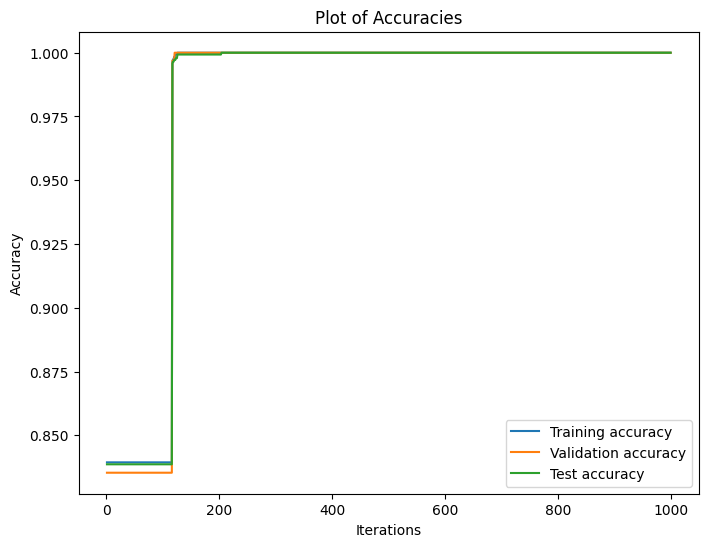

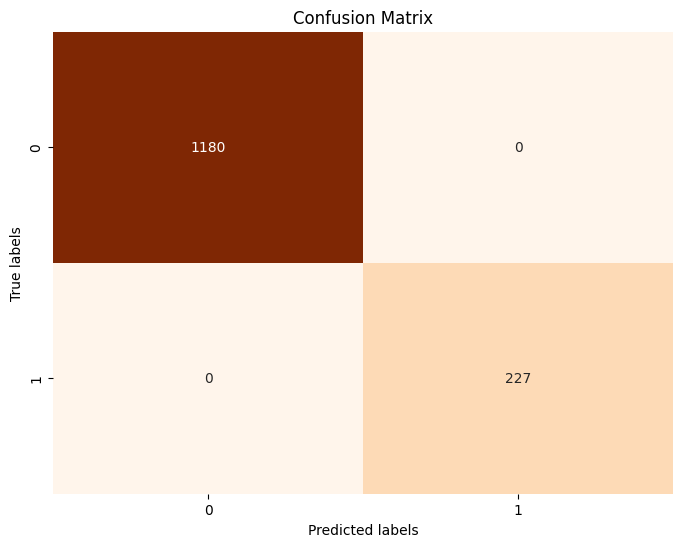


Moderately Complex Model: 2 hidden layer2 with 1 neuron each
Layer 0 - Weight matrix shape: (30, 1)
Layer 1 - Weight matrix shape: (1, 1)
Layer 2 - Weight matrix shape: (1, 1)

Layer 0 - Intercept vector shape: (1,)
Layer 1 - Intercept vector shape: (1,)
Layer 2 - Intercept vector shape: (1,)
Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0


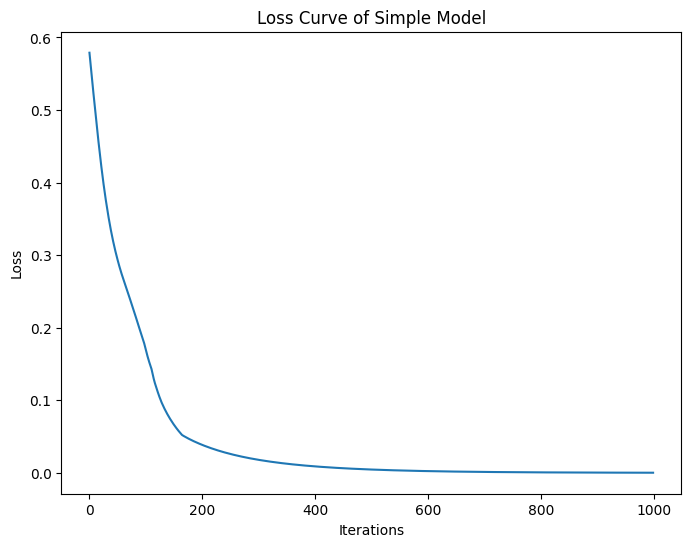

In [26]:
x_3 = data_copy_scaled
y_3 = (data_copy.Hazardous == True).astype(int)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_3, y_3, test_size=0.3, random_state=42, stratify = y_3, shuffle=True)
x_train3, x_val3, y_train3, y_val3 = train_test_split(x_train3, y_train3, test_size=0.1, random_state=42)

mlp3 = MLPClassifier(hidden_layer_sizes=(1, 1), max_iter=1000)


train_accuracies = []
val_accuracies = []
test_accuracies = []


for i in range(1000):
    mlp3.partial_fit(x_train3, y_train3, classes=np.unique(y_train3))
    train_accuracies.append(mlp3.score(x_train3, y_train3))
    val_accuracies.append(mlp3.score(x_val3, y_val3))
    test_accuracies.append(mlp3.score(x_test3, y_test3))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracies')
plt.legend()
plt.show()

y_pred3 = mlp3.predict(x_test3)

# Calculate the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print()
print("Moderately Complex Model: 2 hidden layer2 with 1 neuron each")
for i, coef in enumerate(mlp3.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp3.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

train_accuracy = mlp3.score(x_train3, y_train3)
test_accuracy = mlp3.score(x_test3, y_test3)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

plt.figure(figsize=(8, 6))
plt.plot(mlp3.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve of Simple Model')
plt.show()

# Trial 2: An MLP with 2 hidden layers (1 neuron in each)
## Goal:
> Create an MLP that identifies if an asteroid was hazardous
## Method
> I started by shuffling and stratifying the data. I then split the data into sets using the 70% - 30% rule where 70% of the data is used for training the model and 30% of the data is used for testing the model. I then split the training data into training and validation sets where 10% of the training data is used to to validate and fine tune the model. In total, the data was split into 3 sets: training, testing, and validating sets. I then created an MLP that had 2 hidden layers. Both layers had 1 neuron.
##Results:
> This model resulted in a training accuracy of 100% and testing accuracy of 100%. This can be seen in the confusion matrix where the model was able to correctly identify non-hazardous and hazardous asteroids with no false positives or negatives. In the plot of accuracies, there is a difference in how many iterations it took the model to reach 100% accuracy in comparison to the plot in trial 1. In comparison to trial 1, it took this model longer to reach 100% accuracy. The increase in the amount of iterations it took the model to reach 100% is also seen in the loss curve where it took the model more iterations to decrease the amount of loss in the model. These differences in the amount of iterations is because of the decrease in the amount of neurons in each layer because it is no longer being anlyzed by multiple neurons in one layer.

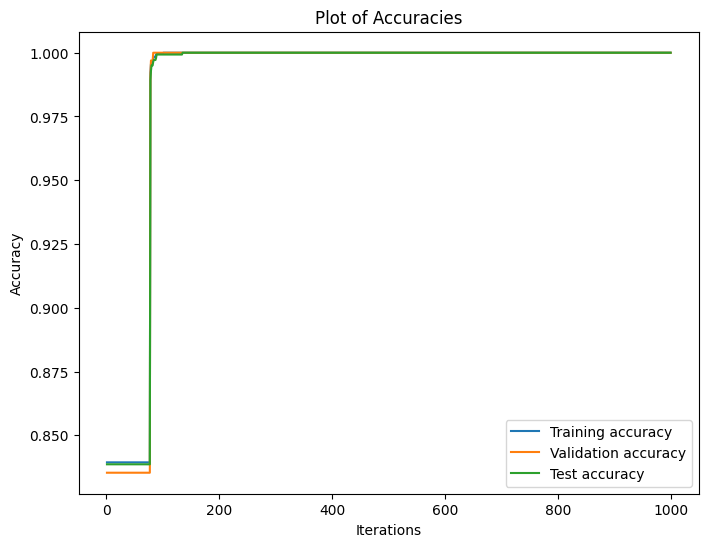

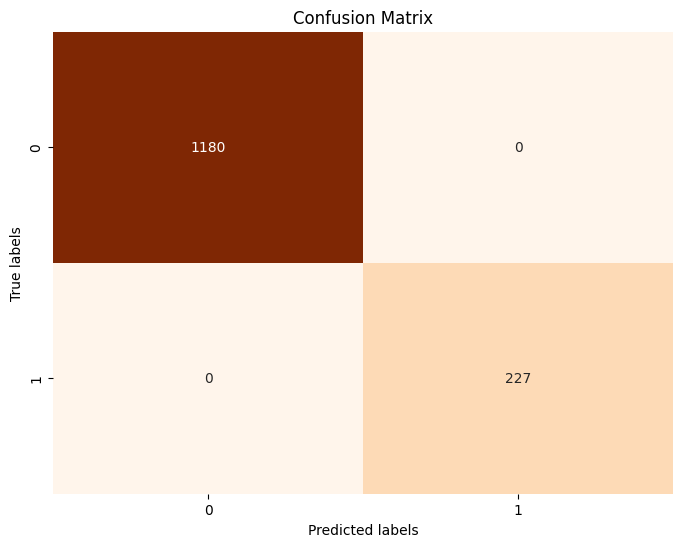


Simple Model: 1 hidden layer, 1 neuron
Layer 0 - Weight matrix shape: (30, 1)
Layer 1 - Weight matrix shape: (1, 1)

Layer 0 - Intercept vector shape: (1,)
Layer 1 - Intercept vector shape: (1,)
Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0


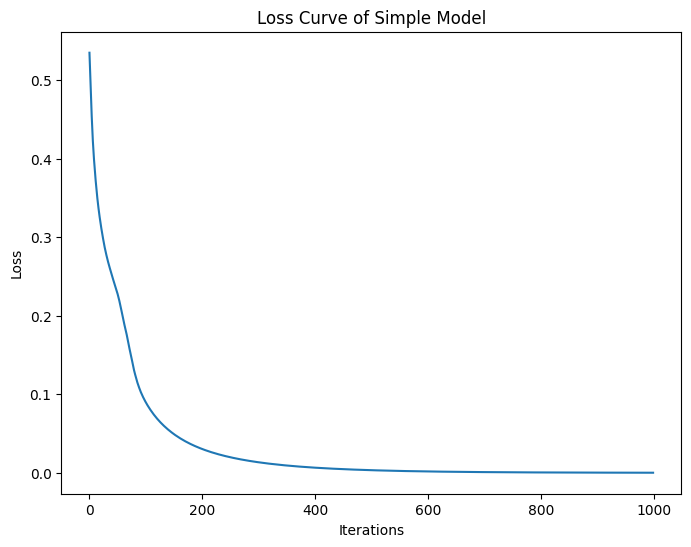

In [36]:
x_other = data_copy_scaled
y_other = (data_copy.Hazardous == True).astype(int)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_other, y_other, test_size=0.3, random_state=42, stratify = y_other, shuffle=True)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.1, random_state=42)

mlp2 = MLPClassifier(hidden_layer_sizes=(1), max_iter=1000)


train_accuracies = []
val_accuracies = []
test_accuracies = []


for i in range(1000):
    mlp2.partial_fit(x_train2, y_train2, classes=np.unique(y_train2))
    train_accuracies.append(mlp2.score(x_train2, y_train2))
    val_accuracies.append(mlp2.score(x_val2, y_val2))
    test_accuracies.append(mlp2.score(x_test2, y_test2))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracies')
plt.legend()
plt.show()

y_pred2 = mlp2.predict(x_test2)

# Calculate the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print()
print("Simple Model: 1 hidden layer, 1 neuron")
for i, coef in enumerate(mlp2.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp2.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

train_accuracy = mlp2.score(x_train2, y_train2)
test_accuracy = mlp2.score(x_test2, y_test2)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

plt.figure(figsize=(8, 6))
plt.plot(mlp2.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve of Simple Model')
plt.show()


# Trial 2: An MLP with 1 hidden layer (1 neuron)
## Goal:
> Create an MLP that identifies if an asteroid was hazardous
## Method
> I started by shuffling and stratifying the data. I then split the data into sets using the 70% - 30% rule where 70% of the data is used for training the model and 30% of the data is used for testing the model. I then split the training data into training and validation sets where 10% of the training data is used to to validate and fine tune the model. In total, the data was split into 3 sets: training, testing, and validating sets. I then created an MLP that had 1 layer with 1 neuron.
##Results:
> This model resulted in a training accuracy of 100% and testing accuracy of 100%. This can be seen in the confusion matrix where the model was able to correctly identify non-hazardous and hazardous asteroids with no false positives or negatives. The plot of accuracies is similar to trial 2's plot where it took more iterations for the model to reach 100% accuracy in comparison to trial 1. However, when comparing the accuracy plot of trials 2 and 3, there is slight decrease in the amount of iterations it takes the model to reach 100%. This is decrease is also seen in the loss curve for trial 3 where it took the model less iterations to decrease the amount of loss in the model. This is due to the decrease in the amount of hidden layers in the model. Since there was a decrease in the amount of hidden layers, the complexity of the model also decreased and the inputs no longer needed to go through multiple layers.

# Table of Accuracy Results
> In the following table, I have recorded each model and their accuracy results
<div>
  <table>
    <tr>
      <th>Trials</th>
      <th>Parameters</th>
      <th>Overall Training Accuracy</th>
      <th>Overall Testing Accuracy</th>
      <th>Estimated Iterations to reach 100% Accuracy</th>
    </tr>
    <tr align = "center">
      <td>1</td>
      <td>2 layers, 40 neurons, 50 neurons</td>
      <td>1.0</td>
      <td>1.0</td>
      <td><1</td>
    </tr>
    <tr align = "center">
      <td>2</td>
      <td>2 layers, 1 neuron each</td>
      <td>1.0</td>
      <td>1.0</td>
      <td> a little more than 100 </td>
    </tr>
    <tr align = "center">
      <td>3</td>
      <td>1 layer, 1 neuron</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>a little less than 100
    </tr>
  </table>
</div>
<blockquote>
  As seen in the table, despite changing the parameters of each model, the accuracy of the models stayed consistent through each trial with both accuracies (training and testing) remaining as 1.0. The only difference between each model was the amount of iterations it took for each model to reach 100% accuracy.


# Concluding Remarks
> To recap, the purpose of this assignment was explore MLP and how the parameters affect each model. The first trial showed how an overly complex model for a simple dataset affected how quick the model was able to accurately identify a hazardous asteroid. The second trial highlighted the discrepancy between the overly complex model and the less complex model with the increase in iterations it took for the model to correctly identify hazardous asteroids in trial 2. The final trial displayed how hidden layers affect the model by decreasing the iterations the model needed to attain 100% accuracy in comparison to trial 2. <br><br>
> It was interesting to see how the amount of neurons and the hidden layers affected the model. Trial 3, with the singular layer and single neuron was surprising because it behaved completely opposite of my expectations. I originally expected a lower accuracy, but the results still displayed a 1.0 accuracy which was fascinating. What was more surprising was that the model in trial 3 took less iterations than the model in trial 2. I originally thought that the model in trial 2 would take less iterations because it was more complex. Even more so because the first trial's model, with 40 neurons and 50 neurons in its layers, was more complex than trial 2's model and took less time than both models from trials 3 and 4. This observation leads me to conclude that there is a sweet spot between complexity and simplicity in neurons and hidden layers, and that leaning too far in one direction or the other would negatively affect the model.